# Deep Learning Final Project
## by Liang Dai


# Diabetic Retinopathy Detection
Identify signs of diabetic retinopathy in eye images


## Experiment Brief
* Dataset_count: 3142
* Validation_count: 858
* Testset_count: 1574
* Test Accuracy: 74.8%
* Model: InceptionV3, train last con2d layer


## Dataset prepare

In [1]:
### upload dataset to Gdrive and then mount to Colab 
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import tensorflow as tf
import numpy as np
tf.enable_eager_execution()
import pandas as pd
import os, shutil
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator




print("tensorflow version ::: " + tf.VERSION)
print("numpy version ::: " + np.version.version)

tensorflow version ::: 1.12.0
numpy version ::: 1.14.6


Using TensorFlow backend.


## Read CSV file

In [0]:
csv_path = './gdrive/My Drive/dataset/trainLabels.csv'

In [4]:
# dataframe = pd.read_csv(csv_path,index_col='image')
dataframe = pd.read_csv(csv_path)
dataframe.head()

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


In [5]:
dataframe[:4000]

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1
5,15_right,2
6,16_left,4
7,16_right,4
8,17_left,0
9,17_right,1


## Change Images dirctory
### When the images have been move to the train and val folder, no need to run 

In [0]:
base_path = './gdrive/My Drive/dataset/'

In [0]:
### Create folders
directory = os.path.dirname('./gdrive/My Drive/dataset/train/')
if not os.path.exists(directory):
  os.makedirs(directory)

directory = os.path.dirname('./gdrive/My Drive/dataset/validation/')
if not os.path.exists(directory):
  os.makedirs(directory)
  
directory = os.path.dirname('./gdrive/My Drive/dataset/test/')
if not os.path.exists(directory):
  os.makedirs(directory)

  
  
for i in range(5):
  directory = os.path.dirname("./gdrive/My Drive/dataset/train/{}/".format(i))
  if not os.path.exists(directory):
    os.makedirs(directory)

for i in range(5):
  directory = os.path.dirname("./gdrive/My Drive/dataset/validation/{}/".format(i))
  if not os.path.exists(directory):
    os.makedirs(directory)

for i in range(5):
  directory = os.path.dirname("./gdrive/My Drive/dataset/test/{}/".format(i))
  if not os.path.exists(directory):
    os.makedirs(directory)

In [8]:
os.listdir(base_path)

['trainLabels.csv',
 'test',
 'smallest',
 'small_dataset',
 'train_1',
 'validation_1',
 'train',
 'validation']

In [9]:
for i in range(len(dataframe[:4000])):
# for i in range(5):
  file_label = dataframe.at[i, 'level']
  file_name = dataframe.at[i, 'image']
  print(file_name)
  print(file_label)
  old_dir = os.path.join(base_path,'small_dataset/',file_name + '.jpeg')
  if np.random.randint(5):
    new_dir = os.path.join(base_path,'train/', str(file_label))
  else:
    new_dir = os.path.join(base_path,'validation/', str(file_label))
  print(old_dir)
  print(new_dir)
  if os.path.exists(old_dir):
    print('MOVEEEEEEEEEEEEEEEEEEEEEEEE')
    shutil.move(old_dir, new_dir)
  print('################')


10_left
0
./gdrive/My Drive/dataset/small_dataset/10_left.jpeg
./gdrive/My Drive/dataset/train/0
MOVEEEEEEEEEEEEEEEEEEEEEEEE
################
10_right
0
./gdrive/My Drive/dataset/small_dataset/10_right.jpeg
./gdrive/My Drive/dataset/train/0
MOVEEEEEEEEEEEEEEEEEEEEEEEE
################
13_left
0
./gdrive/My Drive/dataset/small_dataset/13_left.jpeg
./gdrive/My Drive/dataset/validation/0
MOVEEEEEEEEEEEEEEEEEEEEEEEE
################
13_right
0
./gdrive/My Drive/dataset/small_dataset/13_right.jpeg
./gdrive/My Drive/dataset/train/0
MOVEEEEEEEEEEEEEEEEEEEEEEEE
################
15_left
1
./gdrive/My Drive/dataset/small_dataset/15_left.jpeg
./gdrive/My Drive/dataset/train/1
MOVEEEEEEEEEEEEEEEEEEEEEEEE
################
15_right
2
./gdrive/My Drive/dataset/small_dataset/15_right.jpeg
./gdrive/My Drive/dataset/train/2
MOVEEEEEEEEEEEEEEEEEEEEEEEE
################
16_left
4
./gdrive/My Drive/dataset/small_dataset/16_left.jpeg
./gdrive/My Drive/dataset/train/4
MOVEEEEEEEEEEEEEEEEEEEEEEEE
############

## Import Images

In [10]:
train_dir = './gdrive/My Drive/dataset/train/'
validation_dir = './gdrive/My Drive/dataset/validation/'


train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(299, 299),
        batch_size=20,
        class_mode='sparse')
# Note that the validation data should not be augmented!

val_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(299, 299),
        batch_size=20,
        class_mode='sparse')

Found 3142 images belonging to 5 classes.
Found 858 images belonging to 5 classes.


## Model building

In [11]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

# create the base pre-trained model
conv_base = InceptionV3(weights='imagenet', include_top=False,input_shape=(299, 299, 3))
conv_base.summary()

87916544/87910968 [==============================] - 6s 0us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
____________________________________________

In [0]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'conv2d_93':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [0]:
# conv_base.trainable = False

In [13]:
model = tf.keras.models.Sequential()
model.add(conv_base)
model.add(tf.layers.Flatten())
model.add(tf.layers.Dense(256, activation='relu'))
model.add(tf.layers.Dense(5, activation='relu'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 8, 8, 2048)        21802784  
_________________________________________________________________
flatten_1 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33554688  
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1285      
Total params: 55,358,757
Trainable params: 33,949,701
Non-trainable params: 21,409,056
_________________________________________________________________


In [0]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.train.AdamOptimizer(learning_rate=0.001),
              metrics=['accuracy'])


## Training

In [15]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=1)

Epoch 1/30
100/100 [==============================] - 1705s 17s/step - loss: 4.3118 - acc: 0.7300 - val_loss: 4.0376 - val_acc: 0.7495
Epoch 2/30
100/100 [==============================] - 888s 9s/step - loss: 4.1988 - acc: 0.7395 - val_loss: 3.9730 - val_acc: 0.7535
Epoch 3/30
100/100 [==============================] - 505s 5s/step - loss: 4.2314 - acc: 0.7375 - val_loss: 3.8922 - val_acc: 0.7585
Epoch 4/30
100/100 [==============================] - 502s 5s/step - loss: 4.4644 - acc: 0.7230 - val_loss: 4.0214 - val_acc: 0.7505
Epoch 5/30
100/100 [==============================] - 503s 5s/step - loss: 4.2548 - acc: 0.7360 - val_loss: 4.1184 - val_acc: 0.7445
Epoch 6/30
100/100 [==============================] - 505s 5s/step - loss: 4.2955 - acc: 0.7335 - val_loss: 4.0214 - val_acc: 0.7505
Epoch 7/30
100/100 [==============================] - 500s 5s/step - loss: 4.1826 - acc: 0.7405 - val_loss: 3.9568 - val_acc: 0.7545
Epoch 8/30
100/100 [==============================] - 490s 5s/step 

## Plot

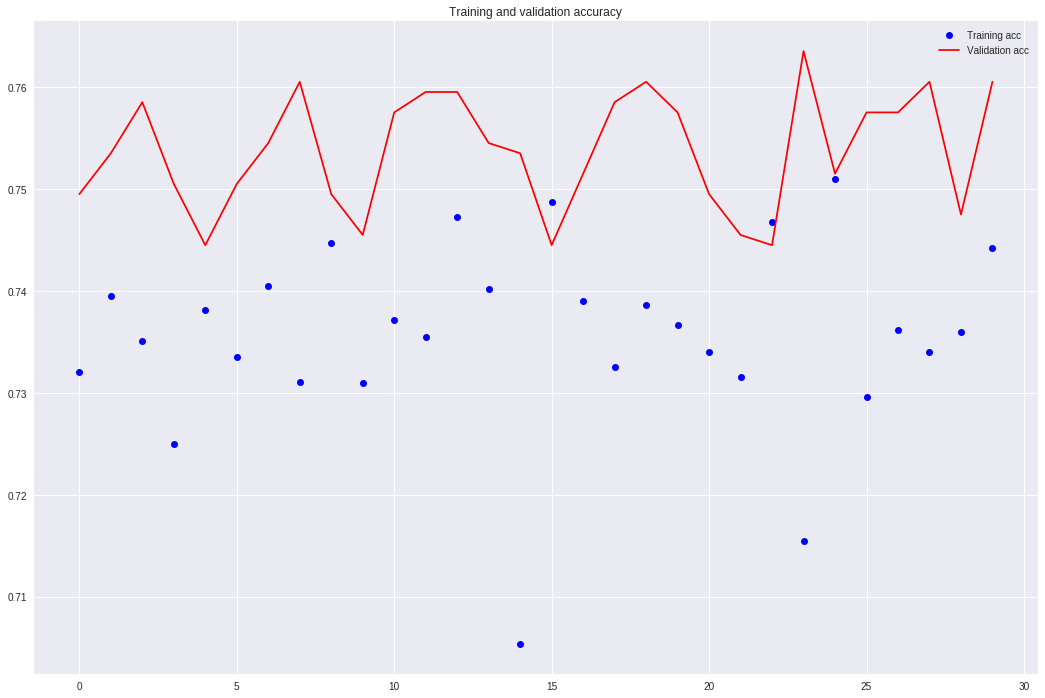

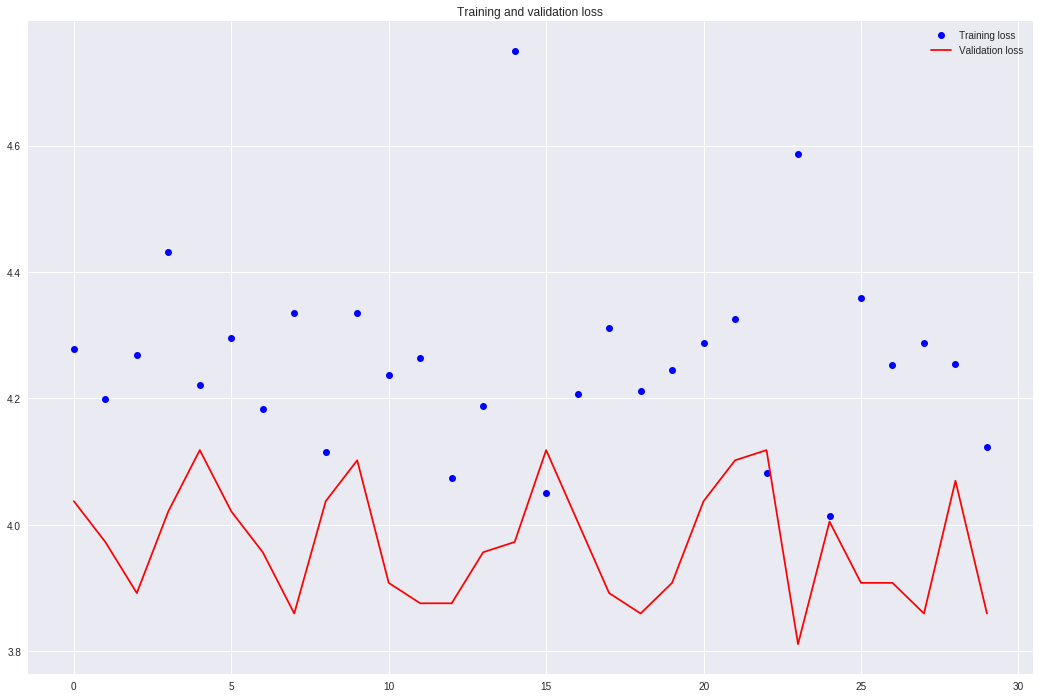

In [17]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(18,12))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(18,12))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Testing

In [28]:
for i in range(len(dataframe[11800:13600])):
# for i in range(5):
  file_label = dataframe.at[i+11800, 'level']
  file_name = dataframe.at[i+11800, 'image']
  print(file_name)
  print(file_label)
  old_dir = os.path.join(base_path,'test/',file_name + '.jpeg')
  new_dir = os.path.join(base_path,'test/', str(file_label))
  print(old_dir)
  print(new_dir)
  if os.path.exists(old_dir):
    print('MOVEEEEEEEEEEEEEEEEEEEEEEEE')
    shutil.move(old_dir, new_dir)
  print('################')

14816_left
1
./gdrive/My Drive/dataset/test/14816_left.jpeg
./gdrive/My Drive/dataset/test/1
################
14816_right
1
./gdrive/My Drive/dataset/test/14816_right.jpeg
./gdrive/My Drive/dataset/test/1
################
14819_left
0
./gdrive/My Drive/dataset/test/14819_left.jpeg
./gdrive/My Drive/dataset/test/0
################
14819_right
0
./gdrive/My Drive/dataset/test/14819_right.jpeg
./gdrive/My Drive/dataset/test/0
################
14824_left
0
./gdrive/My Drive/dataset/test/14824_left.jpeg
./gdrive/My Drive/dataset/test/0
################
14824_right
0
./gdrive/My Drive/dataset/test/14824_right.jpeg
./gdrive/My Drive/dataset/test/0
################
14825_left
1
./gdrive/My Drive/dataset/test/14825_left.jpeg
./gdrive/My Drive/dataset/test/1
################
14825_right
1
./gdrive/My Drive/dataset/test/14825_right.jpeg
./gdrive/My Drive/dataset/test/1
################
14829_left
0
./gdrive/My Drive/dataset/test/14829_left.jpeg
./gdrive/My Drive/dataset/test/0
################
14

In [29]:
test_dir = './gdrive/My Drive/dataset/test/'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(299, 299),
        batch_size=20,
        class_mode='sparse')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1574 images belonging to 5 classes.
test acc: 0.7480000019073486
